<a href="https://colab.research.google.com/github/Milad-Mohseni-Eng/-Python/blob/main/basic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,feature1,feature2,label
0,12,5,1
1,4,1,0
2,10,7,1
3,2,3,0
4,8,2,1


In [8]:
# Basic Machine Learning Demo
# A minimal, reproducible ML demo for portfolio:
# - load CSV from GitHub
# - preprocessing, feature engineering
# - train RandomForest
# - evaluate and save model

# New Section

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [10]:
url = "https://raw.githubusercontent.com/Milad-Mohseni-Eng/-Python/main/data/sample.csv"
df = pd.read_csv(url)
df.head()

,feature1,feature2,label
0,12,5,1
1,4,1,0
2,10,7,1
3,2,3,0
4,8,2,1


In [11]:
df.info()
df.describe()
df = df.dropna().reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  40 non-null     int64
 1   feature2  40 non-null     int64
 2   label     40 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [12]:
df['f1_f2_ratio'] = df['feature1'] / (df['feature2'] + 1)
features = ['feature1','feature2','f1_f2_ratio']
X = df[features]
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



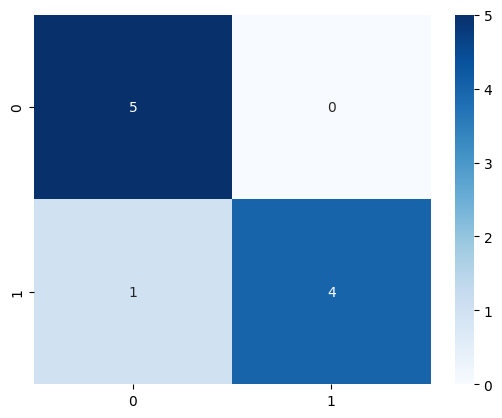

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [15]:
joblib.dump(model, "basic_rf.joblib")
print("Model saved as basic_rf.joblib in Colab environment. Download from left Files panel.")

Model saved as basic_rf.joblib in Colab environment. Download from left Files panel.
